# Comparing the LSTM model with a linear regression 

We compare our LSTM model with a linear regression. The goal will be the same as for the LSTM model, that is, we will predict the next 36 hours. However, since a regression is fast to learn, we will be using the previous 10 days. 

### Importing libraries and getting data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [2]:
df_lr = pd.read_csv('/Users/louispht/Dropbox/git_projects/weatherpredict/data_cleaning/weather_data_initial_clean.csv')
df_lr['dt_iso'] = pd.to_datetime(df_lr['dt_iso'], format='%Y-%m-%d %H:%M:%S.%f')
df_lr = df_lr.set_index('dt_iso')
print('Data Shape = {}'.format(df_lr.shape))
print(df_lr.columns)

Data Shape = (364512, 13)
Index(['temp', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main'],
      dtype='object')


### Preparing training and test data

We prepare our trainind and test set. As with the LTSM model, we will only use temperature data. 

In [3]:
df_lr = df_lr['temp']

In [4]:
len(df_lr)

364512

In [5]:
# Splitting into training and test data, in a 80-20 split
split_point = int(len(df_lr)*(80/100))
lr_train = df_lr[:split_point]
lr_test = df_lr[split_point:]

In [6]:
# Transforming data into numpy array 

lr_train = lr_train.to_numpy().reshape(-1,1)
lr_test = lr_test.to_numpy().reshape(-1,1)

print("Shape of nn_train: ", lr_train.shape)
print("Shape of nn_test: ", lr_test.shape)

Shape of nn_train:  (291609, 1)
Shape of nn_test:  (72903, 1)


In [7]:
x_train = []
y_train = []
x_test = []
y_test = []

# Setting 'n_future' days to predict using 'n_past'days. 
n_future = 1.5
n_past = 10

# Getting number of hours 
n_future = int(n_future * 24)
n_past = int(n_past * 24) 

for i in range(0,len(lr_train)-n_past-n_future+1):
    x_train.append(lr_train[i : i + n_past , 0])     
    y_train.append(lr_train[i + n_past : i + n_past + n_future , 0 ])
for i in range(0,len(lr_test)-n_past-n_future+1):
    x_test.append(lr_test[i : i + n_past , 0])  
    y_test.append(lr_test[i + n_past : i + n_past + n_future , 0 ])

x_train , y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

print('Training data:')
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

Training data:
x_train:  (291334, 240)
y_train:  (291334, 36)
x_test:  (72628, 240)
y_test:  (72628, 36)


# Linear regression model

We first apply a simple linear regression model. 

In [8]:
lm = LinearRegression()
model_lm = lm.fit(x_train, y_train)

In [9]:
pred_lm = model_lm.predict(x_test)

We check MSE and MAE.  

In [10]:
pred_train = model_lm.predict(x_train)

In [11]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_lm)
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_test = mean_absolute_error(y_test, pred_lm)
MedAE_train = median_absolute_error(y_train, pred_train)
MedAE_test = median_absolute_error(y_test, pred_lm)
r2_score = r2_score(y_test, pred_lm)

print("Mean squared error on train set: %.2f" % MSE_train)
print("Mean squared error on test set: %.2f" % MSE_test)
print("Mean absolute error on train set: %.2f" % MAE_train)
print("Mean absolute error on test set: %.2f" % MAE_test)
print("Mediane absolute error on train set: %.2f" % MedAE_train)
print("Median absolute error on test set: %.2f" % MedAE_test)
print("R2 score: %.2f" % r2_score)

Mean squared error on train set: 15.42
Mean squared error on test set: 14.01
Mean absolute error on train set: 2.88
Mean absolute error on test set: 2.74
Mediane absolute error on train set: 2.30
Median absolute error on test set: 2.20
R2 score: 0.91


Our linear regression does not seem to be suffering from overfitting, but bias may be an issue. 

Let's print an example. 

In [12]:
pred_lm.shape

(72628, 36)

In [13]:
print('Predicted temperature {}'.format(pred_lm[1239]))
print('Real temperature {}'.format(y_test[1239]))

Predicted temperature [294.7633014  293.79722912 293.13789618 292.24665839 291.6734844
 291.01807753 290.3325295  289.6536736  289.1150213  288.72193701
 288.77399983 289.29128291 290.24785096 291.55820827 292.80054739
 293.99494261 294.75223109 295.3776293  295.73839375 295.97123886
 296.10124444 295.59254841 294.85816073 294.24427428 293.17513202
 292.18645002 291.47444966 290.57423571 289.96834491 289.30160384
 288.64369787 288.02025485 287.51516818 287.17788445 287.19870494
 287.67525917]
Real temperature [294.73 292.92 291.23 289.4  288.76 288.08 287.69 287.27 286.8  286.41
 287.04 288.42 289.76 290.42 291.08 291.81 292.38 292.86 293.77 294.29
 292.29 291.78 292.   291.97 291.63 290.36 288.82 287.2  286.29 285.85
 285.55 284.73 284.67 284.55 284.8  286.7 ]


Let's visualise the prediction for a 36 days period. 

<function matplotlib.pyplot.show(close=None, block=None)>

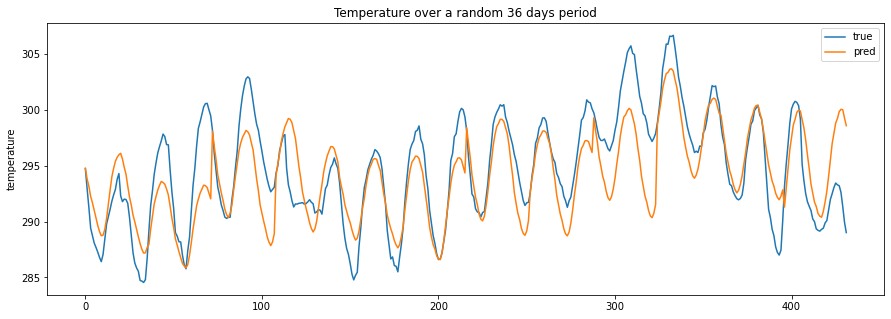

In [14]:
plt_test = []
plt_pred = []

for i in range(12):
    plt_test.append(y_test[1239+36*i])
    plt_pred.append(pred_lm[1239+36*i])

plt_test = np.concatenate(plt_test).ravel()
plt_pred = np.concatenate(plt_pred).ravel()

plt.figure(figsize=(15, 5))
plt.plot(plt_test, label='true')
plt.plot(plt_pred, label='pred')
plt.ylabel('temperature')
plt.title('Temperature over a random 36 days period')
plt.legend()
plt.show

We plot the residuals. 

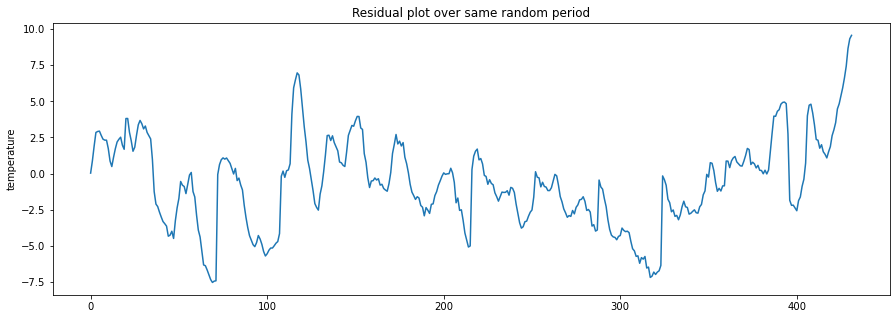

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(plt_pred-plt_test)
plt.ylabel('temperature')
plt.title('Residual plot over same random period')
plt.show()